**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [121]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [122]:
#Read the dataset
op = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [123]:
#Print the shape and the datatype information
print(op.shape)
op.dtypes

(310, 7)


pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [124]:
#Describe the data
op.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [125]:
#Print top 10 lines of the dataset
op.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [126]:
#Print bottom 10 lines of dataset
op.tail(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [127]:
#No null values
op.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [128]:
#Unique values of class
op['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

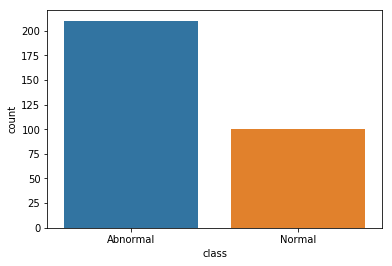

In [129]:
#Distribution of class values
sns.countplot(op['class'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


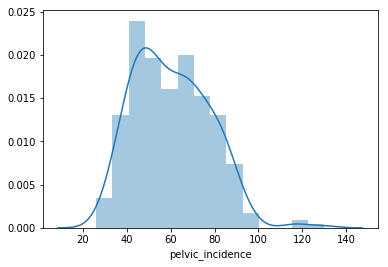

In [130]:
sns.distplot(op['pelvic_incidence'])


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


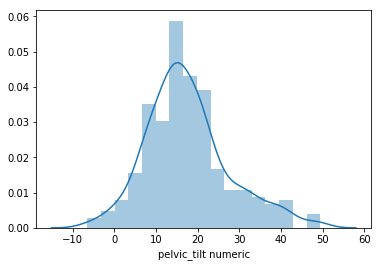

In [131]:
sns.distplot(op['pelvic_tilt numeric'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


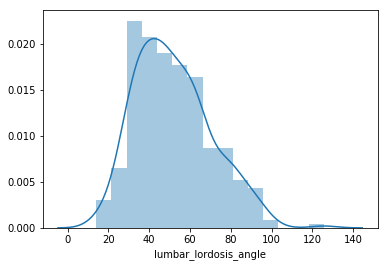

In [132]:
sns.distplot(op['lumbar_lordosis_angle'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


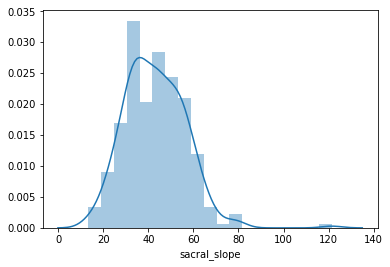

In [133]:
sns.distplot(op['sacral_slope'])               

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


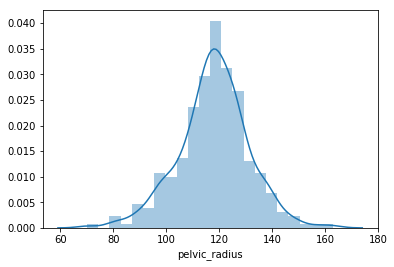

In [134]:
sns.distplot(op['pelvic_radius']) 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


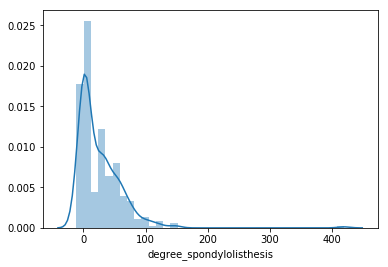

In [135]:
sns.distplot(op['degree_spondylolisthesis'])

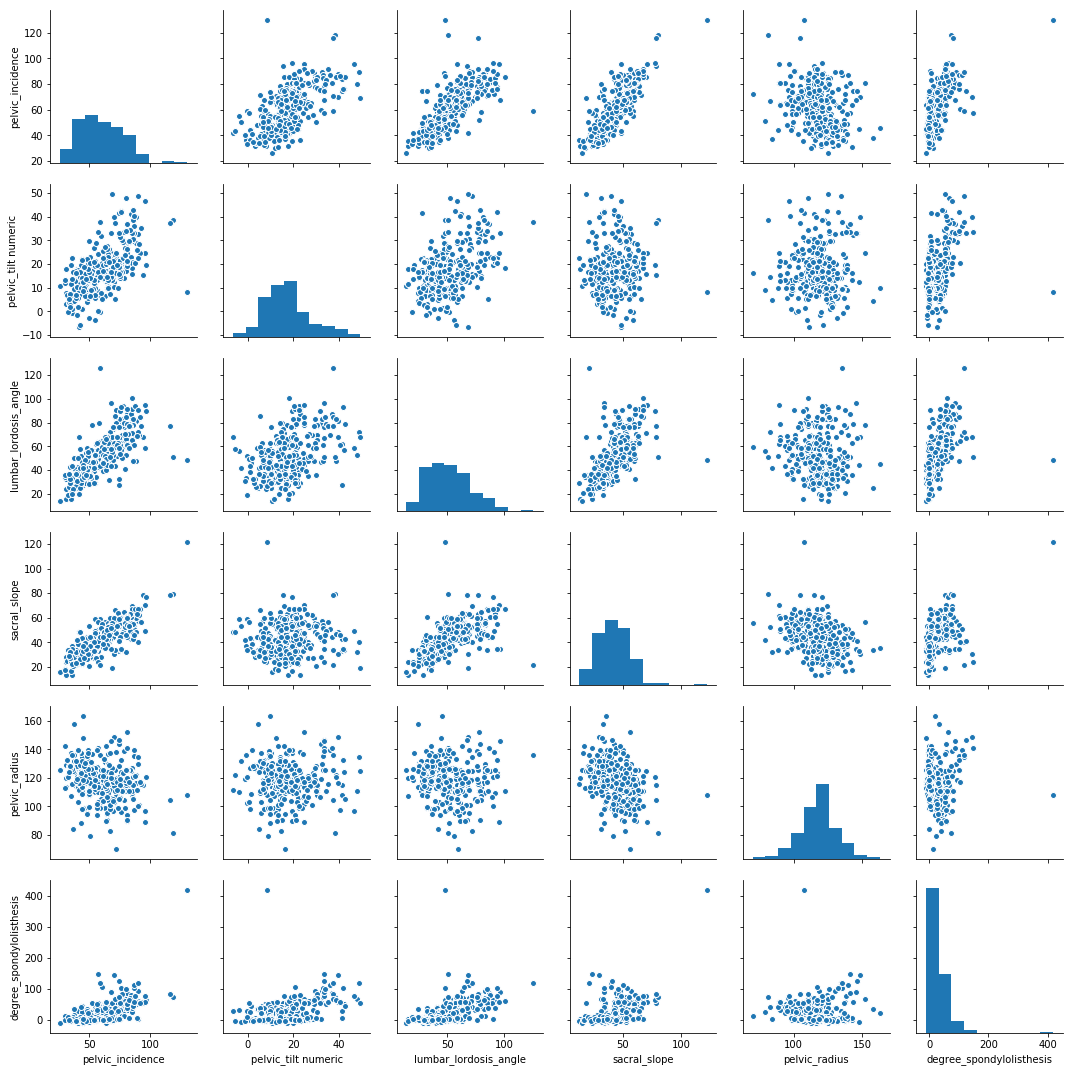

In [136]:
sns.pairplot(op)

# Encode the Class variable to integer.

In [137]:
class_encoding = {"class": {"Abnormal":1, "Normal":2}}

In [138]:
op.replace(class_encoding, inplace = True)

In [139]:
op.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
# Transform data into features and target
X = op.drop(['class'], axis=1) 
y = op['class']

# Normalize your Data (X) to get values between 0 to 1.

In [142]:
from sklearn import preprocessing

In [143]:
x=op.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
op = pd.DataFrame(x_scaled)
op.head(10)

,0,1,2,3,4,5,6
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.0
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.0
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.0
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.0
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.0
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933,0.0
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680,0.0
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890,0.0
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674,0.0
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287,0.0


# Split the dat as train and test with a ratio of 70:30.

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(217, 6)
(93, 6)
(217,)
(93,)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [146]:
# loading library and fitting the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [3, 5, 9]:
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [147]:
#Calculate performance using knn.score()
for k in [3, 5, 9]:
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  print(model.score(X_test, y_test))               # calculate accuracy

0.8602150537634409
0.8817204301075269
0.8602150537634409


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [148]:
# empty list that will hold accuracy scores
ac_scores = []

for k in range(1, 50, 2) :
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  score = accuracy_score(y_test, y_pred)           # get accuracy
  ac_scores.append((score, k))                     # append accuracy score
  
# determining best k
print("The max accuracy and optimal number of neighbors is {}".format(max(ac_scores)))

The max accuracy and optimal number of neighbors is (0.9247311827956989, 31)


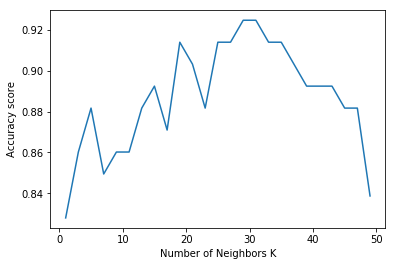

In [149]:
import matplotlib.pyplot as plt

score, k = zip(*ac_scores)
plt.plot(k, score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [150]:
#Read the csv file
op_3c = pd.read_csv("3Classdata.csv")

In [151]:
#Describe the dataset
op_3c.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [152]:
#Data types of the dataframe
op_3c.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [153]:
#Display the first 10 rows
op_3c.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [154]:
#Display a sample 10 rows
op_3c.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
13,53.572170,20.460828,33.100000,33.111342,110.966698,7.044803,Hernia
160,92.026308,35.392674,77.416963,56.633634,115.723530,58.057542,Spondylolisthesis
71,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,Spondylolisthesis
180,37.903910,4.479099,24.710274,33.424811,157.848799,33.607027,Spondylolisthesis
11,31.232387,17.715819,15.500000,13.516568,120.055399,0.499751,Hernia
98,77.655119,22.432950,93.892779,55.222169,123.055707,61.211187,Spondylolisthesis
41,46.442078,8.395036,29.037230,38.047043,115.481405,2.045476,Hernia
43,66.285394,26.327845,47.500000,39.957549,121.219684,-0.799624,Hernia
108,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076,Spondylolisthesis
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,Spondylolisthesis


In [155]:
#No Null values
op_3c.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [156]:
#Unique values of class
op_3c['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

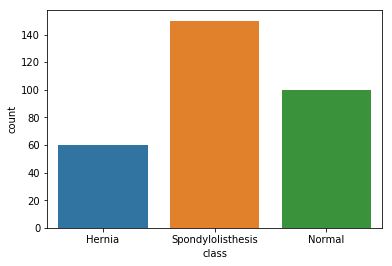

In [157]:
#Countplot of class
sns.countplot(op_3c['class'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


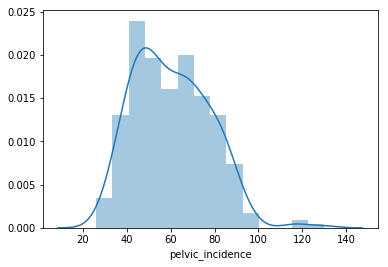

In [158]:
#Distplot for the features
sns.distplot(op_3c['pelvic_incidence'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


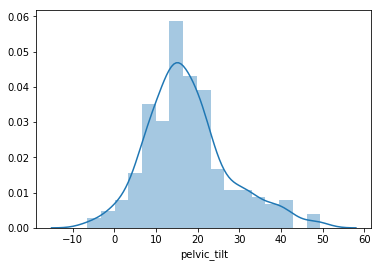

In [159]:
sns.distplot(op_3c['pelvic_tilt'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


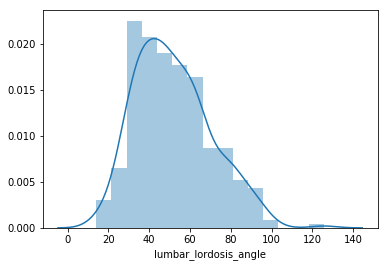

In [160]:
sns.distplot(op_3c['lumbar_lordosis_angle'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


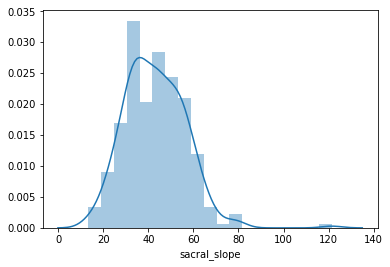

In [161]:
sns.distplot(op_3c['sacral_slope'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


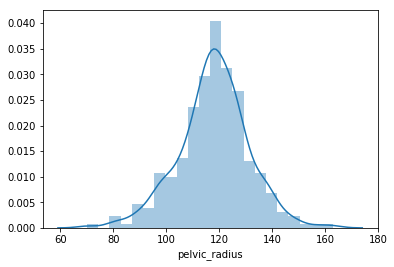

In [162]:
sns.distplot(op_3c['pelvic_radius'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


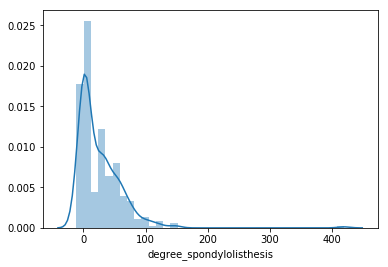

In [163]:
sns.distplot(op_3c['degree_spondylolisthesis'])

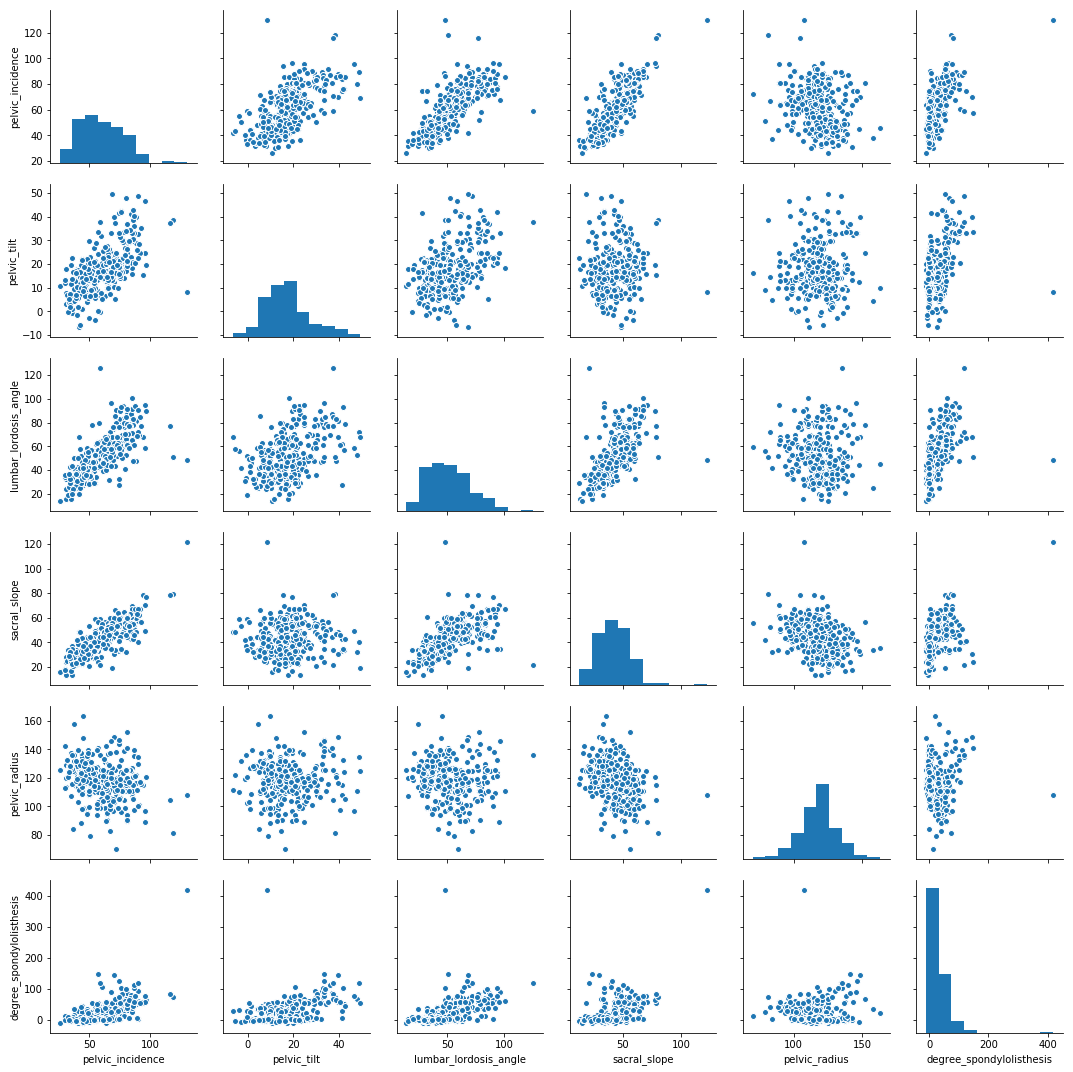

In [164]:
sns.pairplot(op_3c)

In [165]:
encoding = {"class": {"Normal":1, "Hernia":2, "Spondylolisthesis":3}}
op_3c.replace(encoding, inplace = True)
op_3c.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,1
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,1
200,63.364339,20.024621,67.498705,43.339718,130.999258,37.556706,3
179,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,3
30,50.819268,15.402213,42.528939,35.417055,112.192804,10.869566,2
157,44.216464,1.507075,46.110339,42.709390,108.629567,42.810481,3
96,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,3
272,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048,1
109,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987,3
112,42.021386,-6.554948,67.900000,48.576334,111.585782,27.338671,3


In [166]:
# Transform data into features and target
X = op_3c.drop(['class'], axis=1) 
y = op_3c['class']

In [168]:
# Normalize the data between 0 and 1
x=op_3c.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
op_3c = pd.DataFrame(x_scaled)
op_3c.head(10)

,0,1,2,3,4,5,6
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.5
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.5
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.5
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.5
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.5
5,0.136009,0.365744,0.099559,0.119943,0.647879,0.030933,0.5
6,0.263150,0.400439,0.207316,0.223960,0.542916,0.039680,0.5
7,0.185356,0.309190,0.134581,0.196592,0.507455,0.000890,0.5
8,0.170151,0.358811,0.256759,0.156294,0.590614,0.056674,0.5
9,0.101638,0.206581,0.250118,0.169425,0.152264,0.027287,0.5


In [169]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(217, 6)
(93, 6)
(217,)
(93,)


In [170]:
# loading library and fitting the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [3, 5, 9]:
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions

In [171]:
#Calculate performance using knn.score()
for k in [3, 5, 9]:
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  print(model.score(X_test, y_test))               # calculate accuracy

0.8602150537634409
0.8602150537634409
0.8494623655913979


In [172]:
# empty list that will hold accuracy scores
ac_scores = []

for k in range(1, 50, 2) :
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  score = accuracy_score(y_test, y_pred)           # get accuracy
  ac_scores.append((score, k))                     # append accuracy score
  
# determining best k
print("The max accuracy and optimal number of neighbors is {}".format(max(ac_scores)))

The max accuracy and optimal number of neighbors is (0.9032258064516129, 31)


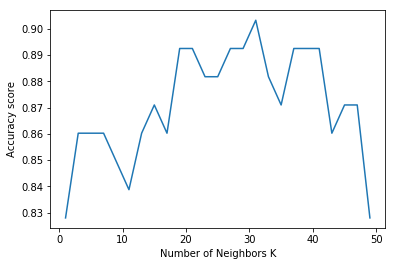

In [173]:
import matplotlib.pyplot as plt

score, k = zip(*ac_scores)
plt.plot(k, score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()